Nama : Ni Putu Sintia Wati <br>
email : sintiawati.putu04@gmail.com

In [29]:
! pip install kaggle

In [30]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [31]:
! cp kaggle.json ~/.kaggle/

In [32]:
! chmod 600 ~/.kaggle/kaggle.json

In [33]:
! kaggle datasets download mahmoudreda55/satellite-image-classification

satellite-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
import zipfile,os
local_zip = '/content/satellite-image-classification.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [35]:
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [36]:
train_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")
validation_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")
test_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2,)
 
# val_data_generator = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=23,
#                     horizontal_flip=True,
#                     shear_range = 0.2,
#                     fill_mode = 'nearest',
#                     validation_split=0.2)

In [38]:
training_generator = train_data_generator.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        color_mode = "rgb",
        class_mode = "categorical",
        batch_size = 16, 
        seed = 0, 
        shuffle = True,
        subset='training')
 
validation_generator = train_data_generator.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        color_mode = "rgb",
        class_mode = "categorical",
        seed = 0,
        shuffle = False,
        subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [39]:
# melakukan augmentasi gambar

import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [41]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
      print("\nAkurasi telah mencapai > 85%")
      self.model.stop_training = True

callbacks = myCallback()

In [42]:
history = model.fit(
      training_generator,
      steps_per_epoch=100,
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=2,  
      verbose=2,
      callbacks = [callbacks]
      )

Epoch 1/20
100/100 - 12s - loss: 0.7135 - accuracy: 0.6119 - val_loss: 0.3994 - val_accuracy: 0.7969
Epoch 2/20
100/100 - 11s - loss: 0.5340 - accuracy: 0.7362 - val_loss: 0.4717 - val_accuracy: 0.7969
Epoch 3/20
100/100 - 11s - loss: 0.5030 - accuracy: 0.7681 - val_loss: 0.6963 - val_accuracy: 0.7500
Epoch 4/20
100/100 - 11s - loss: 0.3713 - accuracy: 0.8569 - val_loss: 0.5462 - val_accuracy: 0.7969
Epoch 5/20
100/100 - 11s - loss: 0.4076 - accuracy: 0.8156 - val_loss: 0.2404 - val_accuracy: 0.8594
Epoch 6/20
100/100 - 11s - loss: 0.3935 - accuracy: 0.8306 - val_loss: 0.1987 - val_accuracy: 0.9062
Epoch 7/20
100/100 - 11s - loss: 0.3535 - accuracy: 0.8550 - val_loss: 0.3656 - val_accuracy: 0.7969
Epoch 8/20
100/100 - 11s - loss: 0.3618 - accuracy: 0.8569 - val_loss: 0.3200 - val_accuracy: 0.8125
Epoch 9/20
100/100 - 11s - loss: 0.3311 - accuracy: 0.8681 - val_loss: 0.1294 - val_accuracy: 0.9688

Akurasi telah mencapai > 85%


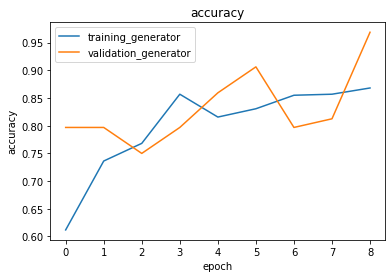

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_generator', 'validation_generator'], loc='upper left')
plt.show()

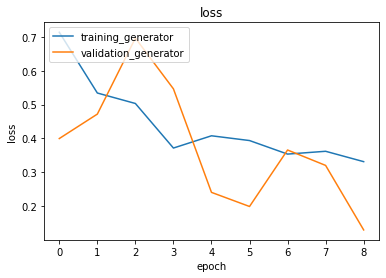

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_generator', 'validation_generator'], loc='upper left')
plt.show()

Saving desert(15).jpg to desert(15).jpg


Hasil Prediksi :  [0. 1. 0. 0.] 

desert(15).jpg
desert


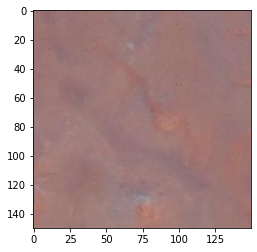

In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')
  
  print(fn)
  if classes[0][0] == 1:
    print( "cloudy")
  elif classes[0][1] == 1:
    print("desert")
  elif classess[0][2] == 1 :
    print("green_area")
  else :
    print("water")

In [46]:
import tensorflow as tf
# warnings.filterwarnings('ignore')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('RPS_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpp9r5poff/assets


INFO:tensorflow:Assets written to: /tmp/tmpp9r5poff/assets
